# Multi-Layer Perceptron

## Introduction

* It's a type of ANN used for supervised learning.
* It is engineered to tackle more complex problem, such as problems that are not linearly separable.
* A typical MLP looks like,
  * <img src="visuals/mlp.jpg" width="380"/>
* Each of the nodes of the layers described can be understood as individual perceptrons and have the usual components.

Typical algorithm of MLP,
1. Initialize weights and biases of each layer.
    1. Since, each neuron is a perceptron, it will have its own bias along with weights entering it.
    2. Hence, assuming we have 2 feature per training example in input,
        1. for hidden layer shown above, weight matrix will look like (**each row denoting neuron in hidden layer and each column denoting weights for corresponding input feature**), $$
\mathbf{W} = \begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32}
\end{bmatrix}$$
        2. And, bias matrix (**each row is a neuron in hidden layer**), $$
\mathbf{b} = \begin{bmatrix}
b_1 \\
b_2 \\
b_3
\end{bmatrix}$$
2. For each batch size (can be one training example also),
    1. Forward pass
    2. Compute loss
    3. Backpropagation
    4. Parameters update
3. Above step is repeated for all epoch.

> If we pass "n" batches in an epoch, and we have "m" epoch for model training, then model parameters will be updated "n"*"m" times.

### Backward Propagation Understanding

* Often, the error function is Sum of squared errors, which can be denoted as, $$E=\frac{1}{2}*\sum{(a_k-t_k)^2} = \frac{1}{2}*[(a_1-t_1)^2+(a_2-t_2)^2]     \text{   ... for number of output neurons}$$
* Let's first talk about **parameters associated with output layer**
  * Taking <u>partial differential wrt w</u>, note --> $\partial{w} = \partial{w_\text{output}}$, $$\frac{\partial{E}}{\partial{w}} = (a_k-t_k)*\frac{\partial{(a_k - t_k)}}{\partial{w}} = (a_k-t_k)*\frac{\partial{a_k}}{\partial{w}} = (a_k-t_k)*\frac{\partial{a_k}}{\partial{z_k}}*\frac{\partial{z_k}}{\partial{w}} = \epsilon*g_k^{'}*\frac{\partial{z_k}}{\partial{w}}$$
  * Above equation, thus can be written as, $$\frac{\partial{E}}{\partial{w_\text{output}}} = \epsilon*g_k^{'}*a_\text{previous layer output} = \delta_k *a_\text{previous layer output} = \text{error signal}*a_\text{previous layer output}$$
    * Above equation can be interpreted as determining how much each $w_\text{output}$ contributes to the error signal by weighting the error by the magnitude of the output activation from the previous (hidden) layer.
  * Now, let's look at <u>biases (b) of output layer</u>, $$\frac{\partial{E}}{\partial{b_\text{output}}} = \epsilon*g_k^{'} = \delta_k = \text{error signal}$$

* Let's now see **parameters associated with hidden layers**
  * Taking <u>partial differential wrt w</u>, note --> $\partial{w} = \partial{w_\text{hidden}}$, $$\frac{\partial{E}}{\partial{w}} = (a_k-t_k)*\frac{\partial{(a_k - t_k)}}{\partial{w}} = (a_k-t_k)*\frac{\partial{a_k}}{\partial{w}} = (a_k-t_k)*\frac{\partial{a_k}}{\partial{z_k}}*\frac{\partial{z_k}}{\partial{w}} = \epsilon*g_k^{'}*\frac{\partial{z_k}}{\partial{w}}$$
    * > Last time it was pretty straight forward because we were dealing with $w_\text{output}$. However, it gets a little tricky dealing with $w_\text{hidden}$.
    * Let's see why
      * $$z_{output} = b_{output} + \sum a_{hidden}*w_{output} = b_{output} + \sum g_{hidden}(z_{hidden}) * w_{output}$$
      * $$z_{output} = b_{output} + \sum g_{hidden}( b_{input} + \sum a_{input}* w_{input}) * w_{output}$$
      * This can be simplified as, $$\frac{\partial E}{\partial w_{ij}} = \sum_k (a_k - t_k) \, g_k'(z_k) \, w_{jk} \, g_j'(z_j) \, a_i = \left( \sum_k \delta_k w_{jk} \right) g_j'(z_j) \, a_i$$
  * for biases, $$\frac{\partial E}{\partial b_j} = \sum_k (a_k - t_k) \, g_k'(z_k) \, w_{jk} \, g_j'(z_j) = g_j'(z_j) \sum_k \delta_k w_{jk} = \delta_j$$

We have to get this working,

<img src="visuals/mlp_backpropagation.jpg" width="500"/>

## Implementation

### Import Libraries

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Defining a simple MLP

In [101]:
class MultiLayerPerceptron:
    def __init__(self, learning_rate, epoch, batch_size, hidden_layers):
        '''
        hidden_layers will define hidden layers architecture. It should be 
        numpy zero array of shape of hidden layers. For 1 hidden layer with 3
        neurons, we can have input as zero array of shape [3,1].
        '''
        self.weights = []
        self.bias = []
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

In [102]:
def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(self, x):
    return self.sigmoid(x)*(1-self.sigmoid(x))
    
MultiLayerPerceptron.sigmoid = sigmoid
MultiLayerPerceptron.sigmoid_derivative = sigmoid_derivative

In [103]:
def forward_pass(self, A_prev, layer_index):
    '''
    The function will give output, A = activation(w.Z_prev + b)
    layer_index - input layer is 0, hidden layer is 1, output layer is 2
    '''
    # A_prev ----->  [batch_size, neurons_current]

    ### maths --> [neurons_next, neurons_current].[neurons_current, batch_size]  
    ###                                                              + [neurons_next, 1]
    #######  = [neurons_next, batch_size]
    Z_curr = np.dot(self.weights[layer_index], A_prev.T) + self.bias[layer_index]
    Z_curr = Z_curr.T              # [batch_size, neurons_next]
    A_curr = self.sigmoid(Z_curr)  # [neurons_next, batch_size]
    
    return A_curr, Z_curr

MultiLayerPerceptron.forward_pass = forward_pass

In [104]:
def backward_pass(self, epsilon, memory_log, layer):
    '''
    definitions of terms used in this method.
    epsilon -  error at output layer
    '''
    if layer == 'output':
        Z_curr = memory_log['Z'][1]       # [1,1]
        A_prev = memory_log['A'][1]       # [1, num_neurons]
        error_signal_output = epsilon*self.sigmoid_derivative(Z_curr)  #[1,1]
        dW = error_signal_output*A_prev   # [1,1]*[1, num_neurons] = [1, num_neurons]
        dB = error_signal_output    # [1,1]
    else:
        error_signal_output = epsilon*self.sigmoid_derivative(memory_log['Z'][1])  # [1,1]
        W_2 = self.weights[1].T    # [num_neurons, 1]       
        deriv_activ = self.sigmoid_derivative(memory_log['Z'][0].T)   # [num_neurons, 1]
        error_signal = W_2*error_signal_output*deriv_activ  # [num_neurons,1]*[1,1]*[num_neurons, 1]
        
        dW = error_signal*memory_log['A'][0]   # [num_neurons,1] * [1,2] = [3,2]
        dB = error_signal
    return dW, dB

MultiLayerPerceptron.backward_pass = backward_pass

In [105]:
def update_params(self, grad_dict):
    for index, param in enumerate(self.weights):
        self.weights[index]= self.weights[index] - self.learning_rate*grad_dict['dW'][index]
        self.bias[index]= self.bias[index] - self.learning_rate*grad_dict['dB'][index]
        
MultiLayerPerceptron.update_params = update_params

In [106]:
def predict(self, X):
    for index, param in enumerate(self.weights):
        A_next, _ = self.forward_pass(X, index)
        X = A_next

    return A_next

MultiLayerPerceptron.predict = predict

In [107]:
def fit(self, X, y):
    if X.ndim == 1:
        X= X.reshape(1,-1)
    total_samples, num_features = X.shape

    self.error_log = []
    self.accuracy_log = []
    
    ######## --------- INITIALIZATION ---------- #########
    # initialize weights and bias for hidden layer
    self.weights.append(np.random.rand(self.hidden_layers.shape[0], 
                                       num_features))  # [num_neurons,num_features]
    self.bias.append(np.random.rand(self.hidden_layers.shape[0], 
                                    1))

    # initialize weights and bias for output layer
    self.weights.append(np.random.rand(1, 
                                       self.hidden_layers.shape[0])) # [1,num_neurons]
    self.bias.append(np.random.rand(1, 
                                    1))

    ######## --------- TRAINING ---------- #########
    for ep in range(self.epoch):
        print("Training for epoch #{}".format(ep+1), end = " ")
        for training_sample in range(total_samples):
            
            memory = {"A":[], "Z":[]}
            
            A_0 = X[training_sample].reshape(self.batch_size,
                                             num_features)
            memory['A'].append(A_0)
            
            ### ----- output from hidden layer ----- ###
            
            A_1, Z_1 = self.forward_pass(X[training_sample].reshape(self.batch_size,
                                                                    num_features), 0)
            memory['A'].append(A_1)
            memory['Z'].append(Z_1)
            
            ### ----- output from output layer ----- ###
        
            A_2, Z_2 = self.forward_pass(A_1, 1)
            memory['A'].append(A_2)
            memory['Z'].append(Z_2)
            
            ### ----- what's the error at output ? ----- ###
            error = memory['A'][2] - y[training_sample]
            
            #################################################
            ### ----- Now, Back propagation ----- ###
            # --- Back propagation at output layer --- #
            
            grads = {'dW':[], 'dB':[]}
            dW2, dB2 = self.backward_pass(error, memory, 'output')
            
            # --- Back propagation at hidden layer --- #
            dW1, dB1 = self.backward_pass(error, memory, 'not_output')
            
            grads['dW'].append(dW1)
            grads['dW'].append(dW2)

            grads['dB'].append(dB1)
            grads['dB'].append(dB2)
            # ----- Updating weights ----- #
            
            self.update_params(grads)          
            self.memory = memory

        accuracy_current = self.get_accuracy(self.predict(X), y)
        print("Accuracy --> {}".format(accuracy_current))
        
        self.accuracy_log.append(accuracy_current)
        self.error_log.append(error)
        
MultiLayerPerceptron.fit = fit

In [108]:
def predict_proba(self, probs, thresh=0.5):
    probs_ = np.copy(probs)
    probs_[probs_ > thresh] = 1
    probs_[probs_ <= thresh] = 0
    return probs_

MultiLayerPerceptron.predict_proba = predict_proba

In [109]:
def get_accuracy(self, Y_pred, Y):
    pred_labels =  self.predict_proba(Y_pred)
    correct = np.sum(pred_labels == Y)
    total = len(Y)
    return correct / total

MultiLayerPerceptron.get_accuracy = get_accuracy

### Loading Dataset

In [110]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
y = y.reshape([150,1])

In [111]:
X.shape, y.shape

((150, 2), (150, 1))

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, y_train.shape

((120, 2), (120, 1))

### Training

In [113]:
mlp = MultiLayerPerceptron(.1, 100, 1, np.zeros((3,1)))

In [114]:
mlp.fit(X_train, y_train)

Training for epoch #1 Accuracy --> 0.325
Training for epoch #2 Accuracy --> 0.675
Training for epoch #3 Accuracy --> 0.675
Training for epoch #4 Accuracy --> 0.675
Training for epoch #5 Accuracy --> 0.675
Training for epoch #6 Accuracy --> 0.675
Training for epoch #7 Accuracy --> 0.675
Training for epoch #8 Accuracy --> 0.675
Training for epoch #9 Accuracy --> 0.675
Training for epoch #10 Accuracy --> 0.675
Training for epoch #11 Accuracy --> 0.675
Training for epoch #12 Accuracy --> 0.675
Training for epoch #13 Accuracy --> 0.675
Training for epoch #14 Accuracy --> 0.675
Training for epoch #15 Accuracy --> 0.675
Training for epoch #16 Accuracy --> 0.675
Training for epoch #17 Accuracy --> 0.675
Training for epoch #18 Accuracy --> 0.675
Training for epoch #19 Accuracy --> 0.675
Training for epoch #20 Accuracy --> 0.7416666666666667
Training for epoch #21 Accuracy --> 0.8083333333333333
Training for epoch #22 Accuracy --> 0.8416666666666667
Training for epoch #23 Accuracy --> 0.89166666

In [115]:
mlp.weights

[array([[0.22751205, 3.18456063],
        [1.33813877, 0.34132354],
        [0.95410404, 0.74571222]]),
 array([[ 6.53380199, -1.18943778, -0.77154912]])]

In [116]:
mlp.bias

[array([[-5.5968771 ],
        [ 1.07828054],
        [ 1.14189127]]),
 array([[-1.6448913]])]

### Inference

In [117]:
mlp.get_accuracy(mlp.predict(X_train), y_train)

0.925

### Visualization

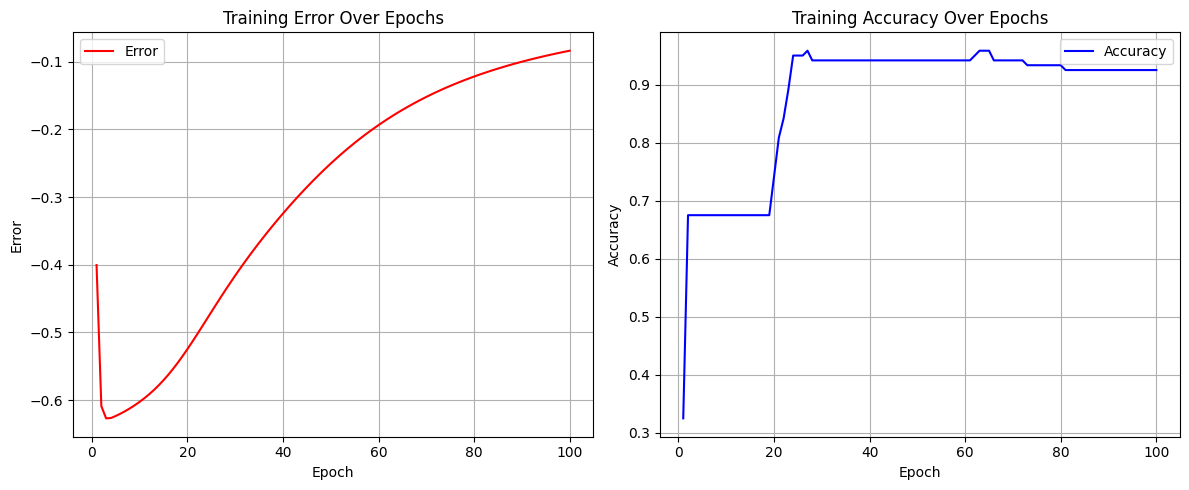

In [118]:
import matplotlib.pyplot as plt

epochs = np.array([j for j in range(1, len(mlp.error_log) + 1)])
error_log = np.array([j[0][0] for j in mlp.error_log])
accuracy_log = np.array([j for j in mlp.accuracy_log])

plt.figure(figsize=(12, 5))

# Plot Error
plt.subplot(1, 2, 1)
plt.plot(epochs, error_log, 'r-', label='Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error Over Epochs')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_log, 'b-', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
